In [1]:
import numpy as np
import pandas as pd

In [2]:
#data load
df = pd.read_csv(r"C:\Users\Adhithya Raviprakash\OneDrive\Documents\GitHub\Auto-Pulse\data\processed\train_processed.csv")
df.shape
df.head()

,engine_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_17_rolling_mean,sensor_17_rolling_std,sensor_18_rolling_mean,sensor_18_rolling_std,sensor_19_rolling_mean,sensor_19_rolling_std,sensor_20_rolling_mean,sensor_20_rolling_std,sensor_21_rolling_mean,sensor_21_rolling_std
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000,0.000000,0.00000,0.000000
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000,0.000000,0.00000,0.000000
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000,0.000000,0.00000,0.000000
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000,0.000000,0.00000,0.000000
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,391.8,1.095445,2388.0,0.0,100.0,0.0,38.958,0.073621,23.39302,0.033498


In [3]:
#sanity check
df.isnull().sum().sum()


np.int64(0)

In [4]:
#cont
df.describe()

,engine_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_17_rolling_mean,sensor_17_rolling_std,sensor_18_rolling_mean,sensor_18_rolling_std,sensor_19_rolling_mean,sensor_19_rolling_std,sensor_20_rolling_mean,sensor_20_rolling_std,sensor_21_rolling_mean,sensor_21_rolling_std
count,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,...,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000
mean,105.553758,123.331338,17.211973,0.410004,95.724344,485.840890,597.361022,1467.035653,1260.956434,9.894999,...,358.377434,19.349563,2259.086001,93.661535,97.751353,2.825500,25.785944,6.780889,15.471653,4.068663
std,72.867325,83.538146,16.527988,0.367938,12.359044,30.420388,42.478516,118.175261,136.300073,4.265554,...,36.764079,13.401033,203.514229,79.517831,8.218292,3.532883,9.144360,4.965359,5.486622,2.979640
min,1.000000,1.000000,-0.008700,-0.000600,60.000000,445.000000,535.480000,1242.670000,1023.770000,3.910000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,57.000000,0.001300,0.000200,100.000000,449.440000,549.960000,1357.360000,1126.830000,5.480000,...,342.600000,1.303840,2209.200000,0.000000,96.986000,0.000000,18.664000,0.136272,11.199010,0.080797
50%,89.000000,114.000000,19.998100,0.620000,100.000000,489.050000,605.930000,1492.810000,1271.740000,9.350000,...,354.000000,22.642880,2270.800000,76.573494,100.000000,0.000000,23.212000,7.593980,13.929220,4.556176
75%,164.000000,173.000000,35.001500,0.840000,100.000000,518.670000,642.340000,1586.590000,1402.200000,14.620000,...,391.200000,30.053286,2388.000000,175.700598,100.000000,6.739509,38.642000,11.398796,23.186780,6.840483
max,260.000000,543.000000,42.008000,0.842000,100.000000,518.670000,645.110000,1616.910000,1441.490000,14.620000,...,398.000000,50.312026,2388.000000,259.072770,100.000000,8.254179,39.732000,15.968003,23.838700,9.552104


In [5]:
#RUL Corellation

corr = df.corr(numeric_only=True)["RUL"].sort_values(ascending=False)
corr.head(15)
corr.tail(15)

sensor_12_rolling_std    -0.082906
sensor_5_rolling_std     -0.083575
sensor_10_rolling_std    -0.084844
sensor_1_rolling_std     -0.086677
sensor_14_rolling_mean   -0.088326
sensor_2_rolling_std     -0.088762
sensor_11_rolling_std    -0.088828
sensor_9_rolling_std     -0.090535
sensor_4_rolling_std     -0.090615
sensor_3_rolling_std     -0.090872
sensor_17_rolling_std    -0.091279
sensor_16_rolling_std    -0.108234
sensor_15_rolling_mean   -0.121779
engine_id                -0.176727
cycle                    -0.630410
Name: RUL, dtype: float64

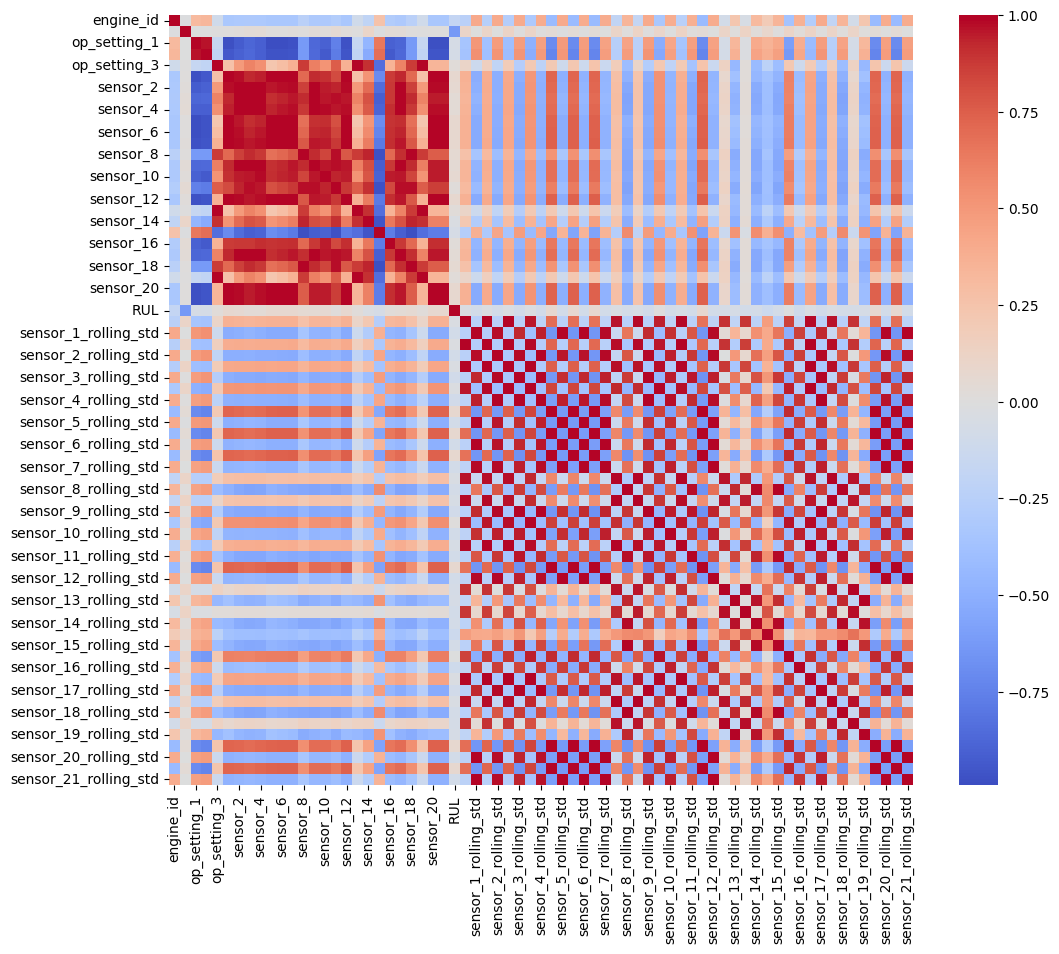

In [6]:
#MultiColinearity
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.show()

<Axes: >

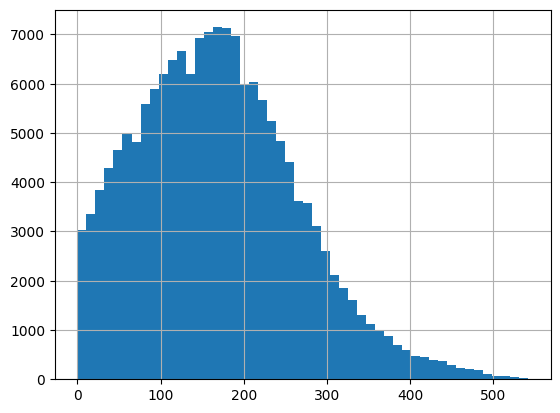

In [7]:
#RUL Distribution
df["RUL"].hist(bins=50)